In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [ ]:
import pandas as pd

# Read the CSV file
bnbdf = pd.read_csv("All the Intermediate Colleges in Pakistan.csv")


In [ ]:
duplicate_count = bnbdf.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
airbnbdf = bnbdf.drop_duplicates() ## remove duplicates / unncessary rows

Number of duplicate rows: 0


In [ ]:
airbnbdf.isnull().sum()

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64

<Axes: >

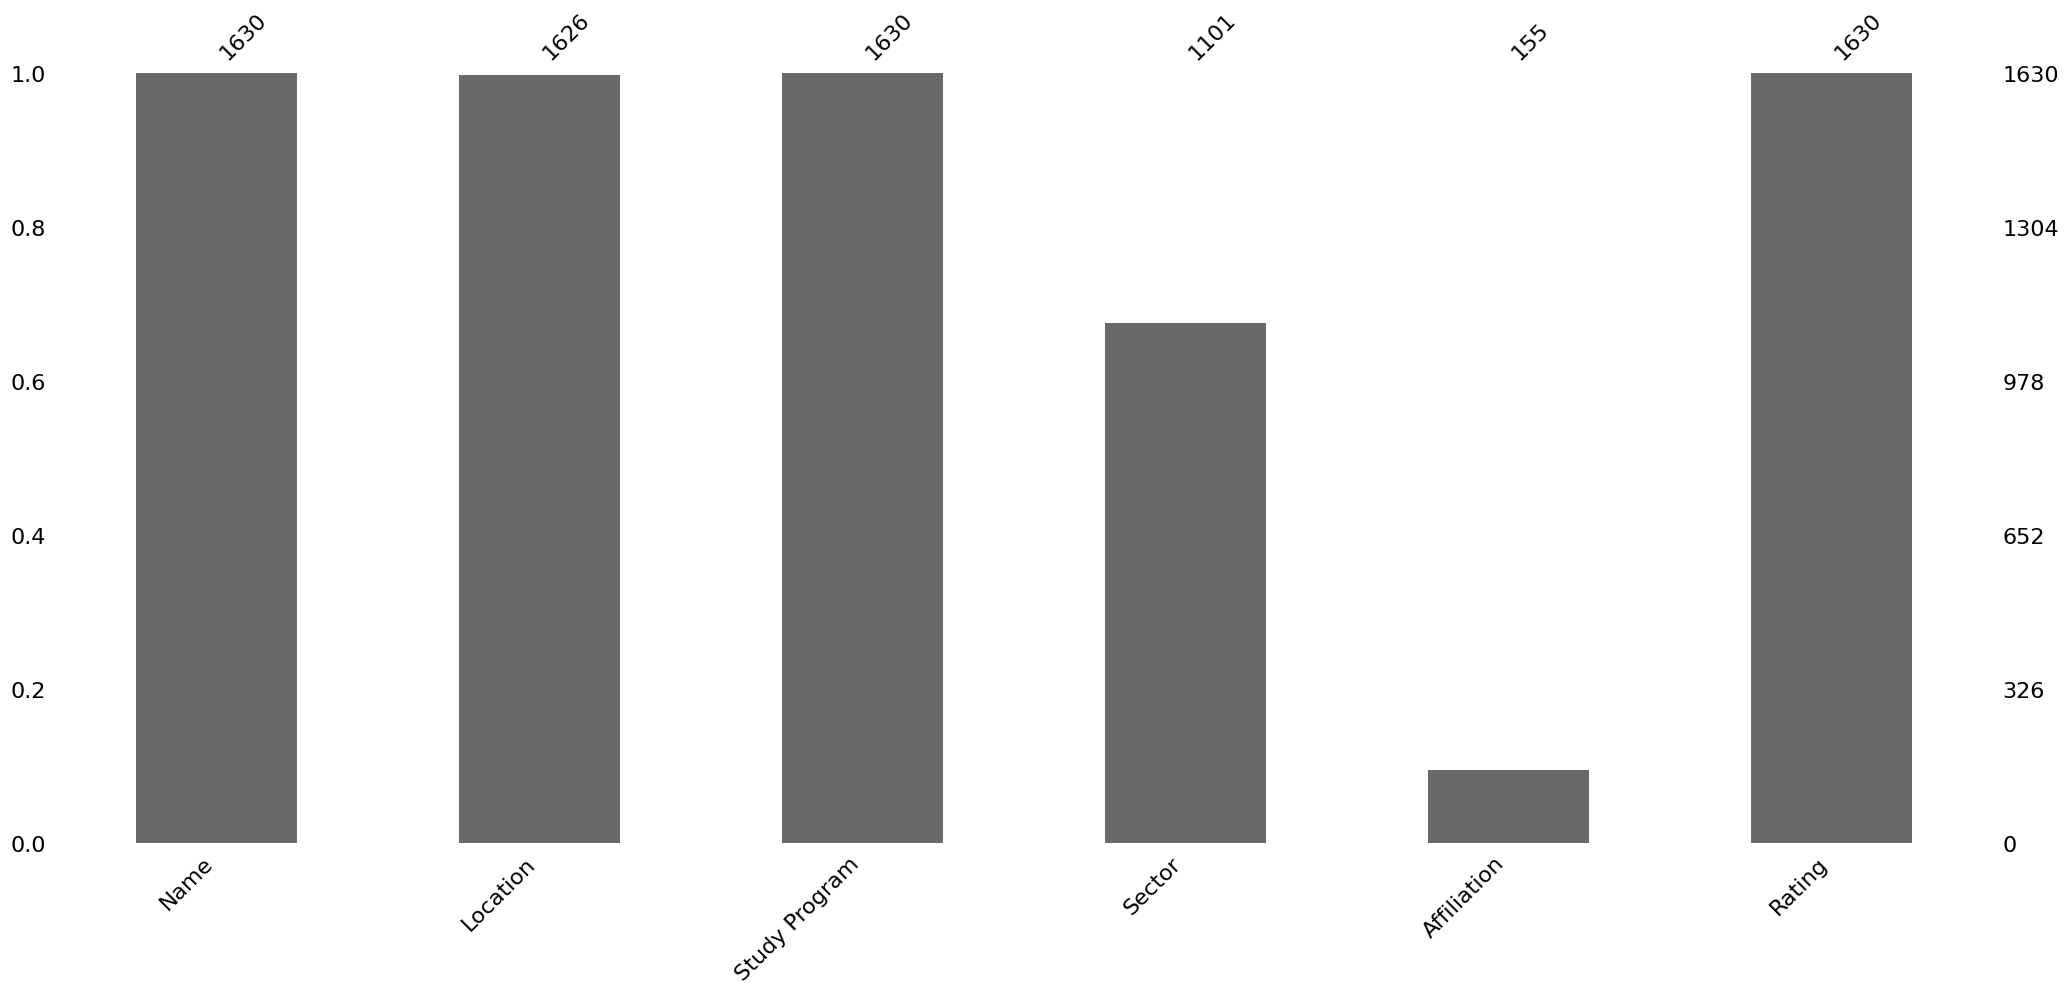

In [ ]:
mano.bar(airbnbdf)


# Missing Value Analysis

In [ ]:

#  rows where 'Location' is missing
missing_location_rows = airbnbdf[airbnbdf['Location'].isnull()]

#   names where the location is missing
print("Names with missing location:")
print(missing_location_rows['Name'].tolist())

Names with missing location:
['Murray College Sialkot', 'Institute of Cost and Management Accountants of Pakistan (ICMAP) Hyderabad', 'College of Pathologists Pakistan (COPPK), Karachi', 'Pakistan Aimed Education Colleges Faisalabad']


In [ ]:

# List of missing values to fill in order
missing_values = ['Sialkot', 'Hyderabad', 'Karachi', 'Faisalabad']

# Fill in the missing values in the specified order
for i, idx in enumerate(missing_location_rows.index):
    airbnbdf.at[idx, 'Location'] = missing_values[i]

# Print the updated DataFrame
print("\nUpdated DataFrame:")
print(airbnbdf)


Updated DataFrame:
                                                   Name  \
0                                      Campus.pk Lahore   
1           Allama Iqbal Open University Aiou Islamabad   
2              Government College University Gcu Lahore   
3                Govt College University GCU Faisalabad   
4     Lahore College For Women University (Lcwu) Lahore   
...                                                 ...   
1625               Riphah International College Lodhran   
1626                     Govt College of Education Bagh   
1627                  Riphah International College Swat   
1628                  Riphah International College Dina   
1629                Riphah International College Dargai   

                                               Location  \
0     Office 206, 2nd Floor Siddique Trade Center Ma...   
1                           Sector H-8, Islamabad-44000   
2             GC University, Katchery Road Lahore 54000   
3                          Kotwali 

In [ ]:

# View only the rows that have been updated
updated_rows = airbnbdf.loc[missing_location_rows.index]

# Print the updated rows
print("\nUpdated rows:")
print(updated_rows)


Updated rows:
                                                   Name    Location  \
63                               Murray College Sialkot     Sialkot   
865   Institute of Cost and Management Accountants o...   Hyderabad   
1304  College of Pathologists Pakistan (COPPK), Karachi     Karachi   
1446       Pakistan Aimed Education Colleges Faisalabad  Faisalabad   

                                          Study Program   Sector  \
63    FA ICS Computer Science Icom FSc Pre Engineeri...      NaN   
865                                                 CMA      NaN   
1304  FA FSc Pre Engineering FSc Pre Medical ICom IC...      NaN   
1446  FA FSc Pre Engineering FSc Pre Medical ICom IC...  Private   

                           Affiliation Rating  
63    Affiliate with Punjab University     5*  
865                                NaN     0*  
1304                               NaN     0*  
1446                               NaN     0*  


<Axes: >

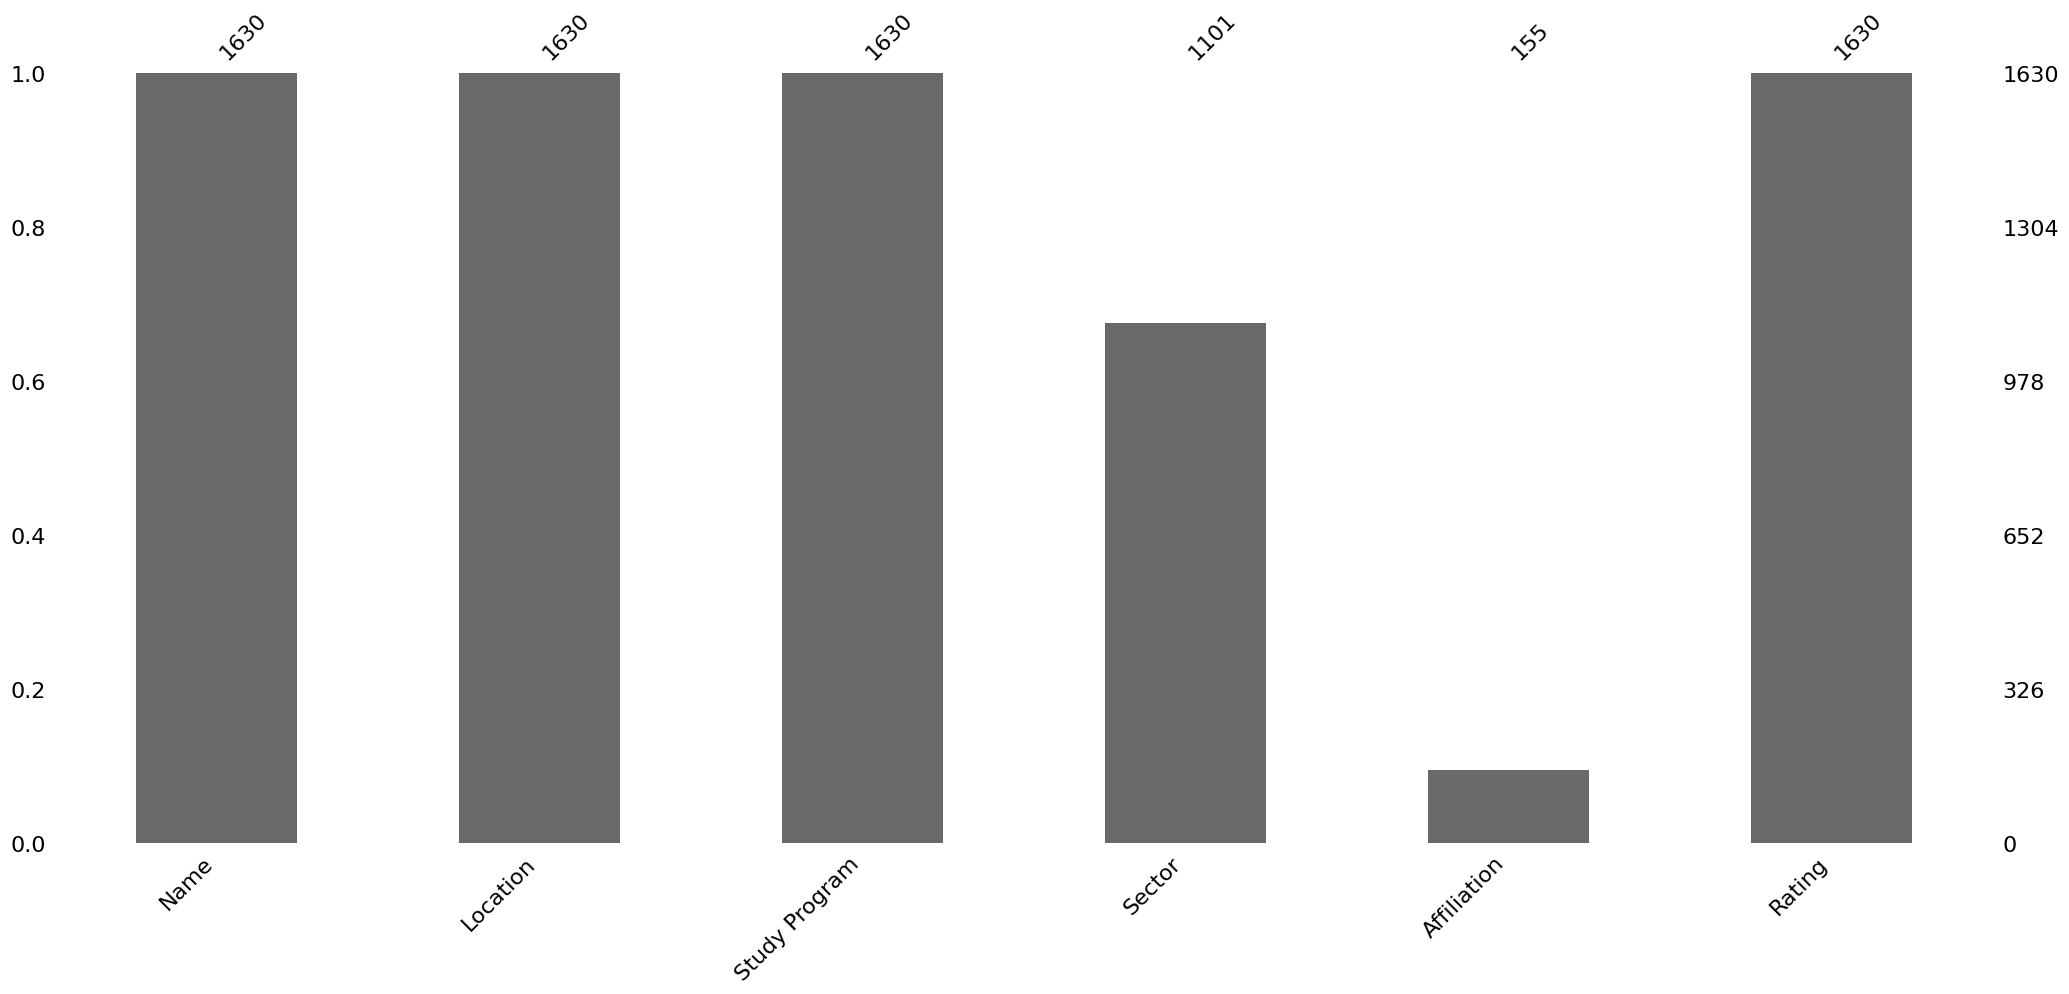

In [ ]:
mano.bar(airbnbdf)


In [ ]:

#  rows where 'Sector' is missing
missing_Sector_rows = airbnbdf[airbnbdf['Sector'].isnull()]

#   names where the Sector is missing
print("College Names with missing Sector:")
print(missing_Sector_rows['Name'].tolist())

College Names with missing Sector:
['Army Medical College, Rawalpindi', 'Govt Post Graduate Islamia College for Women Cooper Road Lahore', 'Bahria College Karsaz Karachi (BCKK)', 'Islamabad College for Girls F-6/2 Islamabad', 'University of Home Economics Lahore', 'Anees Hussain Karachi', 'EDGE System International Lahore', 'Rehman Medical College Peshawar', 'Army Public School and College Lahore Cantt', 'CFE College of Accountancy and Finance Lahore', 'National Institute of Management Science Faisalabad', 'STEP Institute of Art, Design & Management', 'Govt. College of Technology Railway Road Lahore', 'Murray College Sialkot', 'Unique Group of Institutions Lahore', 'Army Public College of Management and Sciences APCOMS Rawalpindi', 'Girls Cadet College Abbottabad', 'Govt Emerson College Multan', 'Kips Academy Multan', 'Swedish Institute of Engineering And Technology Rawalpindi', 'Cadet College, Jhelum', 'Govt. College for Women, Gulberg Lahore', 'Peak Solution, Lahore', 'Aitchison Coll

In [ ]:
# Check if 'Govt', or 'Government' are present in the 'Name' column
result = missing_Sector_rows['Name'].str.contains('Govt|Government')

# Get the indices of rows where the condition is True
indices_to_update = result[result].index

# Set the 'Sector' to 'Public' for these rows
airbnbdf.loc[indices_to_update, 'Sector'] = 'Public'



In [ ]:

# View only the rows that have been updated
updated_rows2 = airbnbdf.loc[missing_Sector_rows.index]

# Print the updated rows
print("\nUpdated rows:")
print(updated_rows2)


Updated rows:
                                                   Name  \
27                     Army Medical College, Rawalpindi   
29    Govt Post Graduate Islamia College for Women C...   
41                 Bahria College Karsaz Karachi (BCKK)   
43          Islamabad College for Girls F-6/2 Islamabad   
44                  University of Home Economics Lahore   
...                                                 ...   
1535  Jauhar College of Information Technology & Man...   
1542             Govt. Institute of Commerce (W), Jhang   
1569              Bulley Shah College of Commerce Kasur   
1574              Workers Intermediate College, Karachi   
1589                    The Accountants College Karachi   

                                               Location  \
27              Abid Majid Road Rawalpindi Cantt  46000   
29                                  Cooper Road, Lahore   
41        Habib Ibrahim Rahmatullah Road Karsaz Karachi   
43          Islamabad College for Girls 

In [ ]:
airbnbdf.isnull().sum()

Name                0
Location            0
Study Program       0
Sector            442
Affiliation      1475
Rating              0
dtype: int64

In [ ]:
missing_Sector_rows.fillna('Private', inplace=True)
airbnbdf.update(missing_Sector_rows)

<ipython-input-18-fa847eab9e15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_Sector_rows.fillna('Private', inplace=True)


In [ ]:
airbnbdf.isnull().sum()

Name                0
Location            0
Study Program       0
Sector              0
Affiliation      1026
Rating              0
dtype: int64

<Axes: >

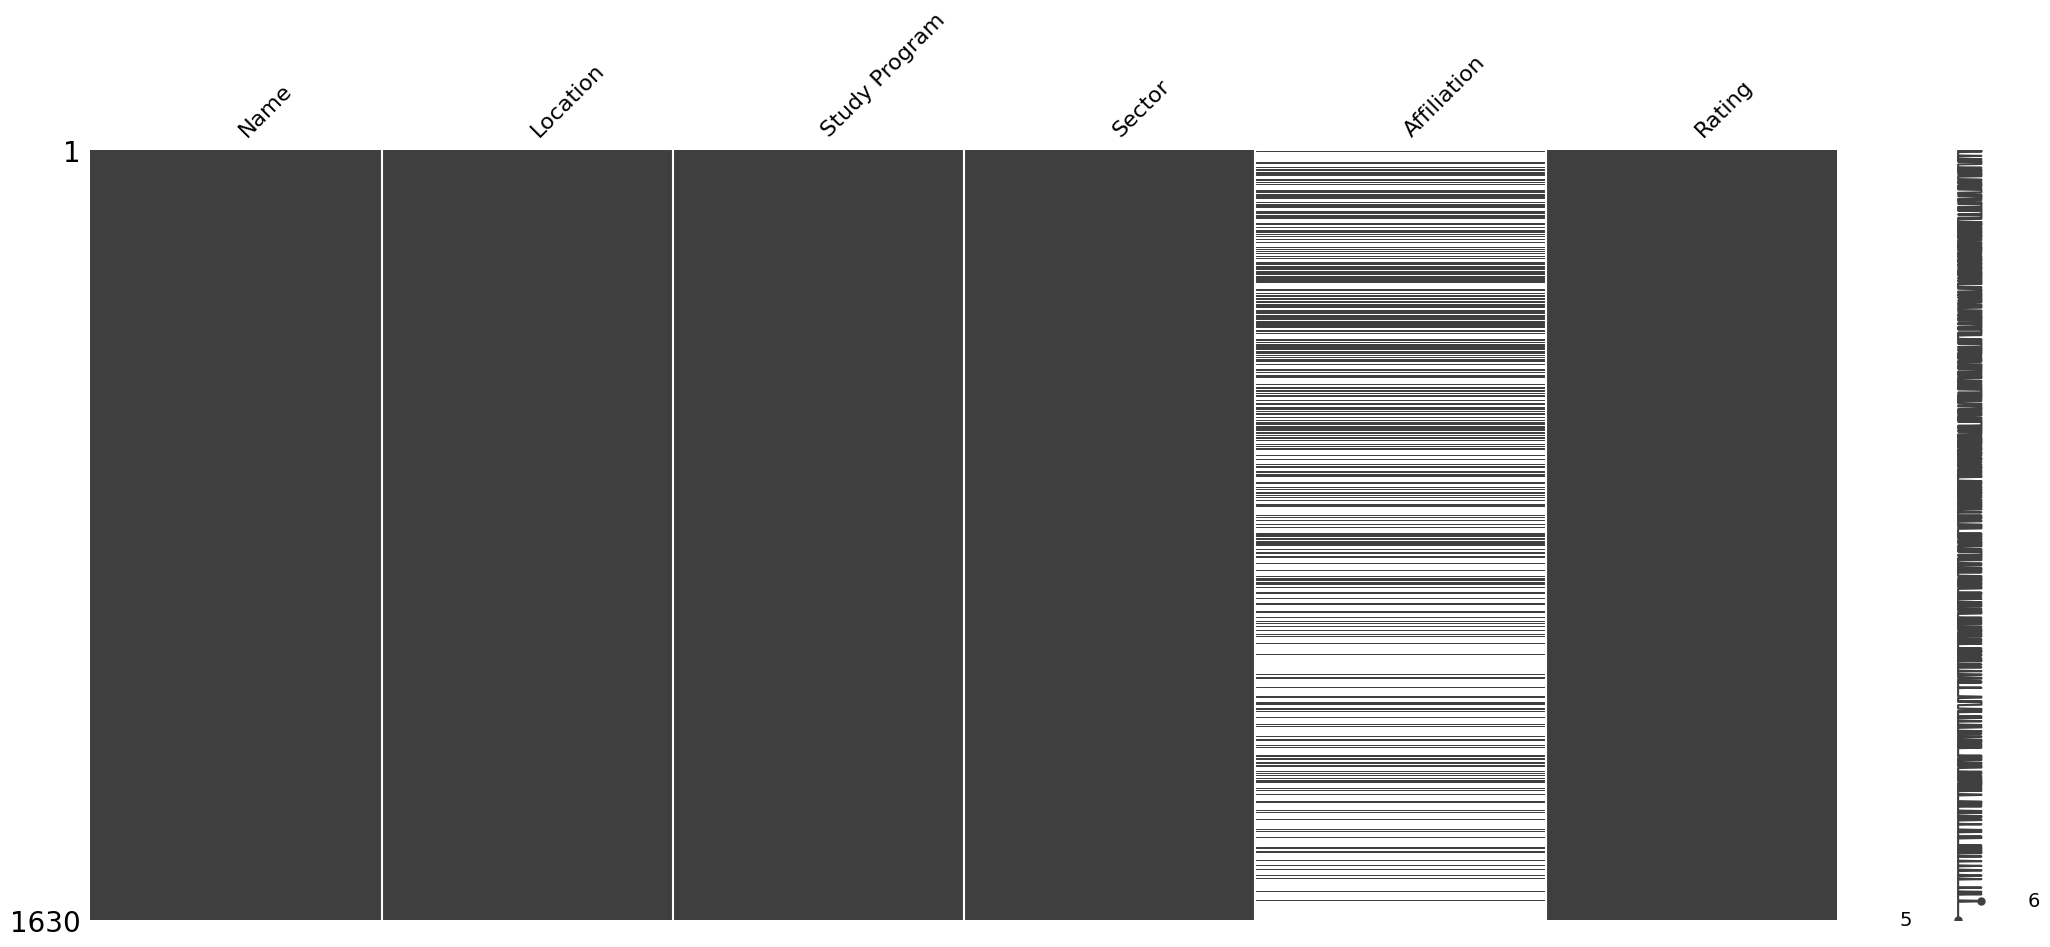

In [ ]:
mano.matrix(airbnbdf)

<Axes: >

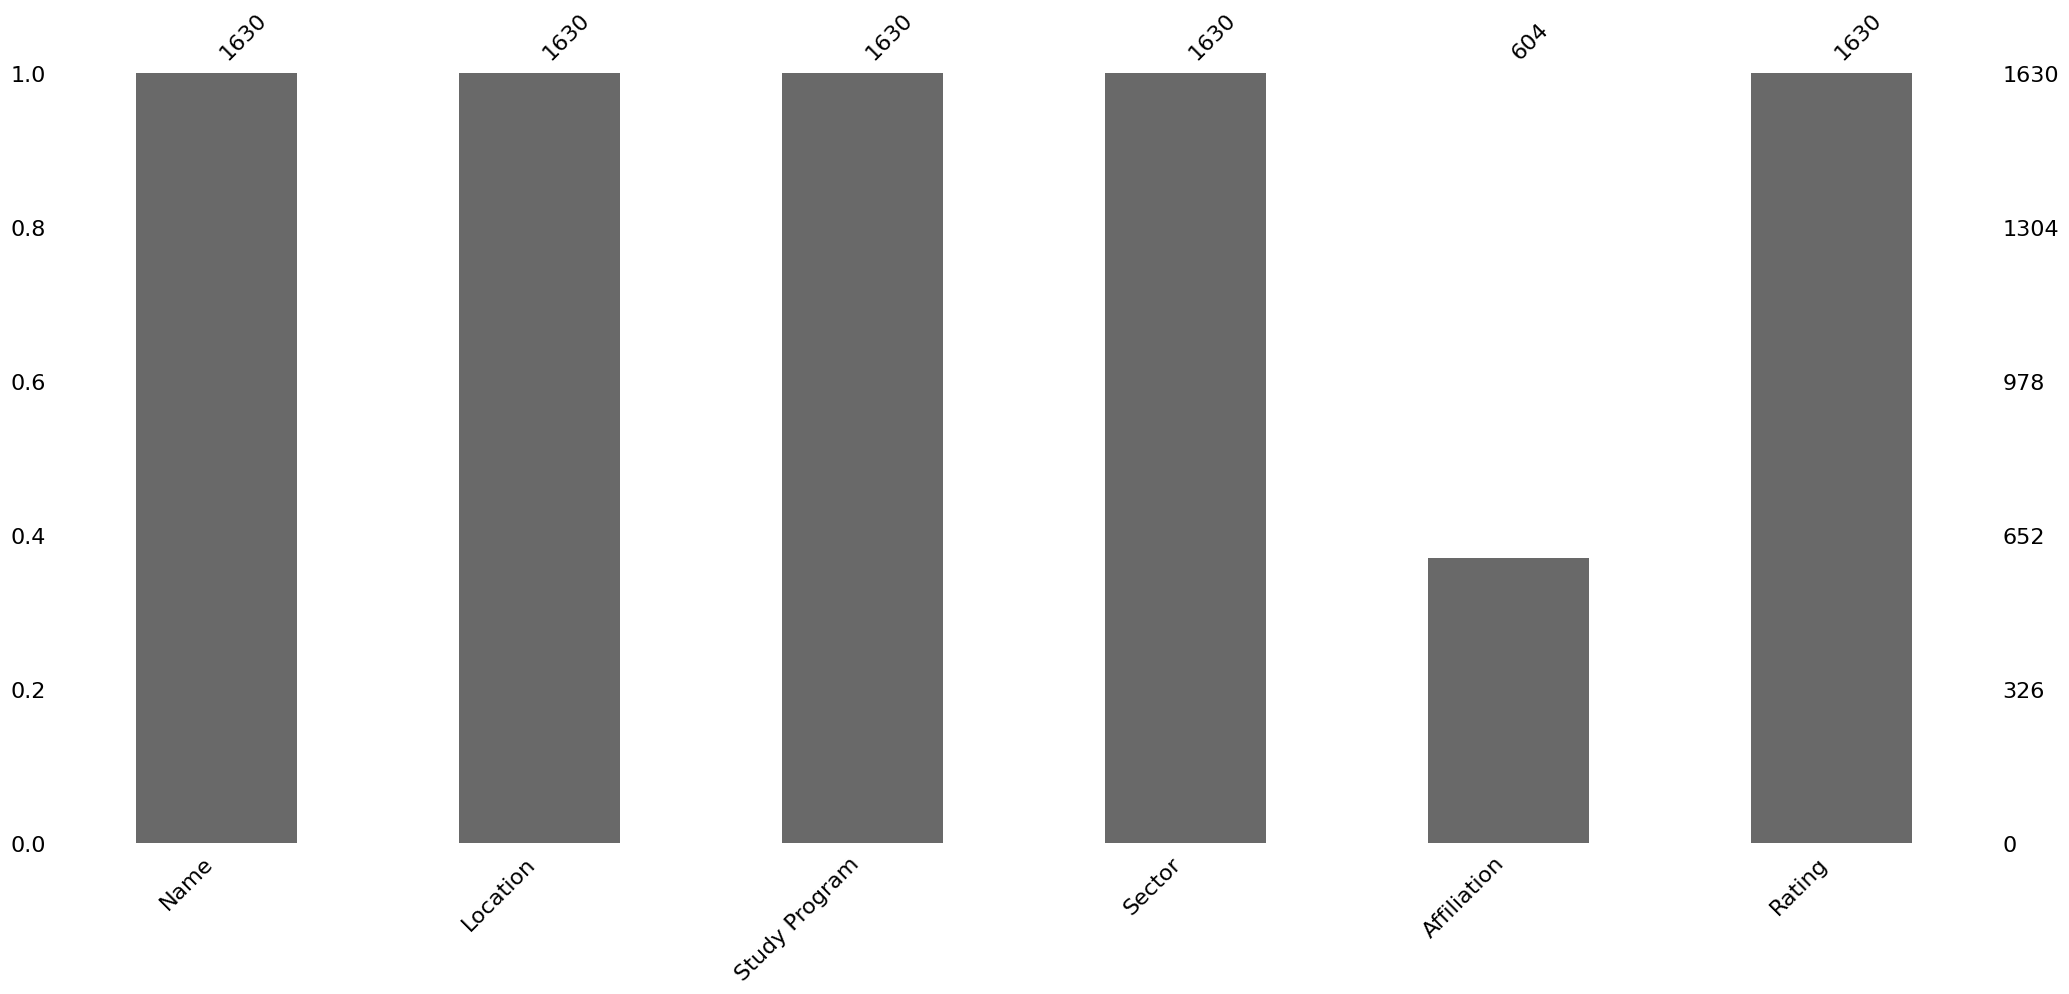

In [ ]:
mano.bar(airbnbdf)

Since the Affliation Column has 1026 missing values out of 1630 values, we will drop the column.

In [ ]:
airbnbdf.drop('Affiliation', axis=1, inplace=True)

Viewing the updated Columns (Excluding Affiliation Column)

In [ ]:
# Iterate over columns and print their names with the first value
for column in airbnbdf.columns:
    print(f"Column: {column}, First Value: {airbnbdf[column].iloc[0]}")

Column: Name, First Value: Campus.pk Lahore
Column: Location, First Value: Office 206, 2nd Floor Siddique Trade Center Main Boulevard Gulberg III Lahore 
Column: Study Program, First Value: FSc Pre Engineering Fsc Pre Medical
Column: Sector, First Value: Private
Column: Rating, First Value: 0*
Column: cities, First Value: Lahore


Creating a new column 'Cities' to classify the Location for futher analysis

Updated CSV with all inconsistent values removed and Cities column.

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("college_updated.csv")


# Exploratory Data Analysis

## Visualizing distribution of non-numerical columns



First Column - Ratings

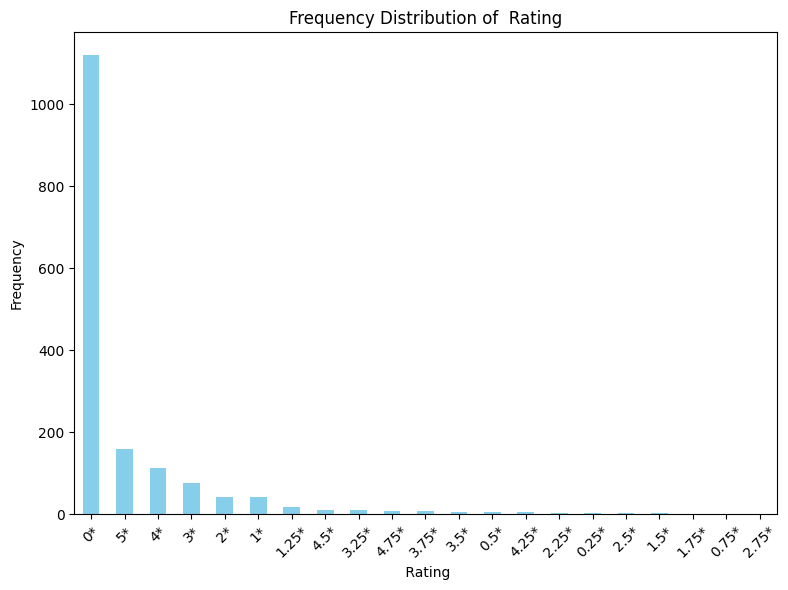

In [ ]:
import matplotlib.pyplot as plt


# Create a bar plot for the 'Rating' column
plt.figure(figsize=(8, 6))
airbnbdf['Rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of  Rating')
plt.xlabel(' Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
unique_values = airbnbdf['Rating'].unique()

# Output the unique values
print(unique_values)

['0*' '5*' '4*' '3*' '2*' '1*' '3.5*' '4.25*' '3.25*' '4.5*' '3.75*'
 '1.25*' '0.5*' '2.25*' '4.75*' '1.75*' '0.25*' '2.5*' '0.75*' '2.75*'
 '1.5*']


Grouping ratings into 0* 1* 2* 3* 4* 5*

In [ ]:

# Mapping function
def map_to_nearest_star(value):
    return f"{round(float(value.replace('*', '')))}*"

# Apply the mapping function to the column
airbnbdf['new_Rating'] = airbnbdf['Rating'].apply(map_to_nearest_star)

# Output the unique mapped values
unique_mapped_values = airbnbdf['new_Rating'].unique()
print(unique_mapped_values)

['0*' '5*' '4*' '3*' '2*' '1*']


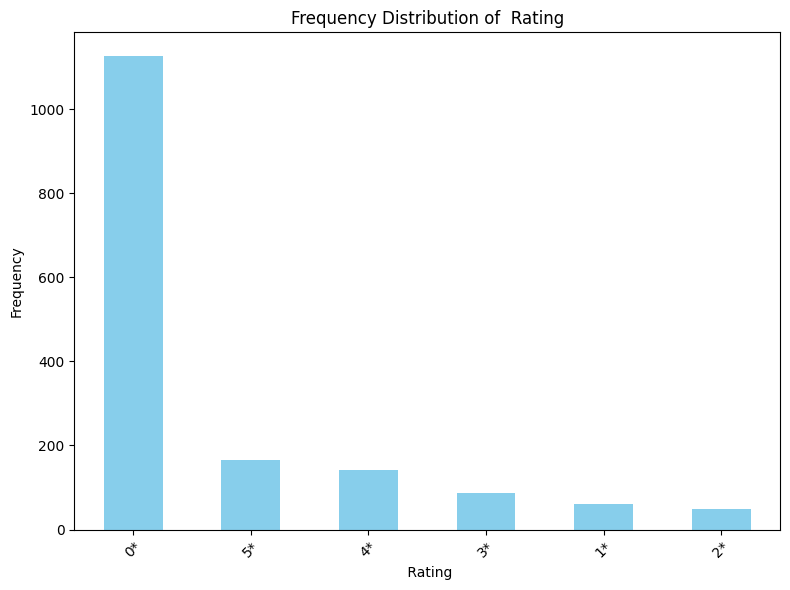

In [ ]:
import matplotlib.pyplot as plt


# Create a bar plot for the 'Rating' column
plt.figure(figsize=(8, 6))
airbnbdf['new_Rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of  Rating')
plt.xlabel(' Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

We can see that the number of 0*s are the highest, indicating poor education status throughout the country.

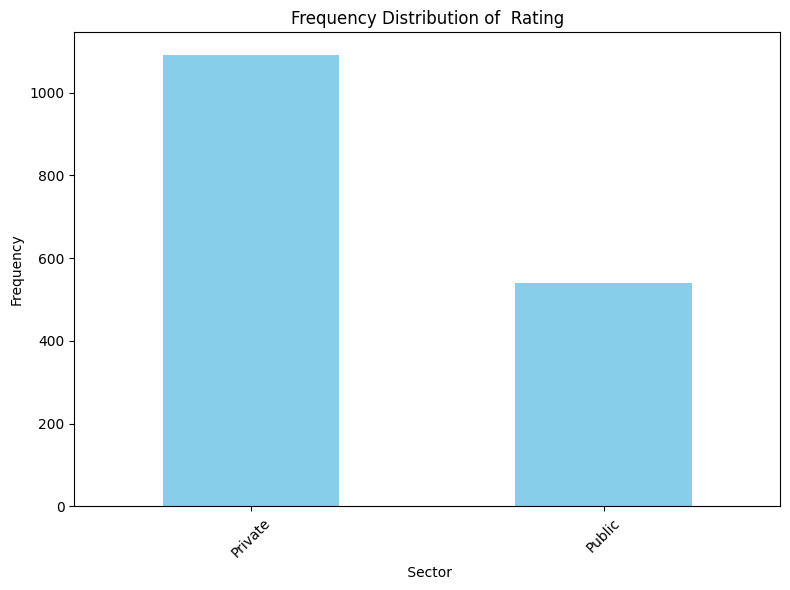

In [ ]:
import matplotlib.pyplot as plt


# Create a bar plot for the 'Rating' column
plt.figure(figsize=(8, 6))
airbnbdf['Sector'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of  Rating')
plt.xlabel(' Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

The number of private institutes is greater than the number of public.

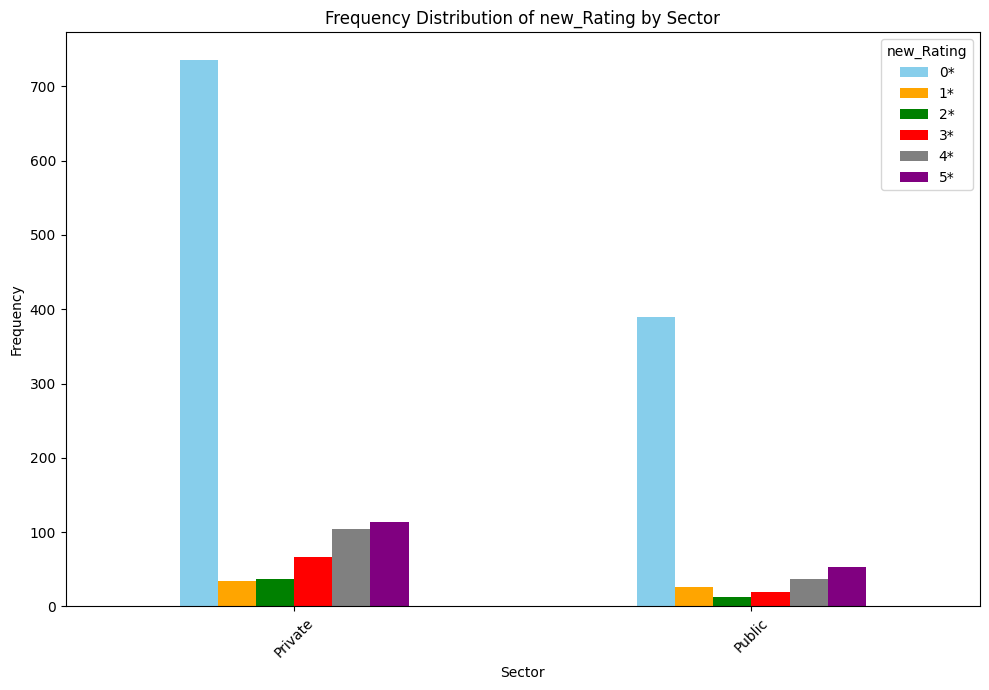

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(airbnbdf['Sector'], airbnbdf['new_Rating'])

# Plot the grouped bar plot
contingency_table.plot(kind='bar', figsize=(10, 7), color=['skyblue', 'orange', 'green','red','gray','purple'])
plt.title('Frequency Distribution of new_Rating by Sector')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='new_Rating')
plt.show()

Delving into the two Sectors - Private and Public, we see that private institutes have as low as 0* ratings and so does the public institutes. So both Sectors are lacking somewhere.

However the Private sector has more 5* ratings.

In [ ]:
airbnbdf.to_csv('/content/updated_dataset.csv', index=False)


In [ ]:
from google.colab import files
files.download("/content/updated_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

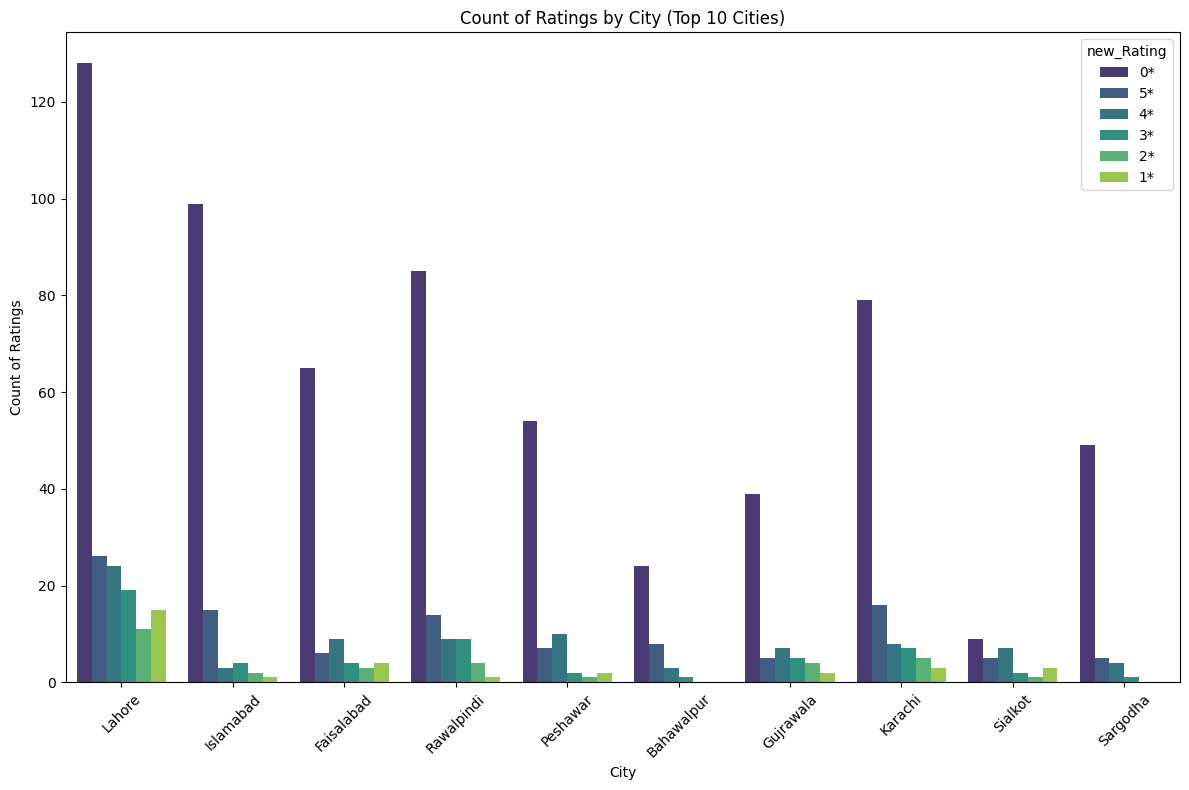

In [ ]:

# Convert 'new_Rating' to numerical values
rating_mapping = {'0*': 0, '1*': 1, '2*': 2, '3*': 3, '4*': 4, '5*': 5}
df['new_Rating_encoded'] = df['new_Rating'].map(rating_mapping)

# Filter the data for top ratings
top_rated_df = df[df['new_Rating'] == '5*']

# Count the number of top ratings per city
top_cities_count = top_rated_df['Cities'].value_counts().nlargest(10).index

# Filter the original DataFrame to include only the top 10 cities
top_cities_df = df[df['Cities'].isin(top_cities_count)]

# Visualization

# Bar Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Cities', data=top_cities_df, hue='new_Rating', palette='viridis')
plt.title('Count of Ratings by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that the top cities Karachi, Lahore and Islamabad have the highest number of 0* Rating.

# Excluding 0* Ratings

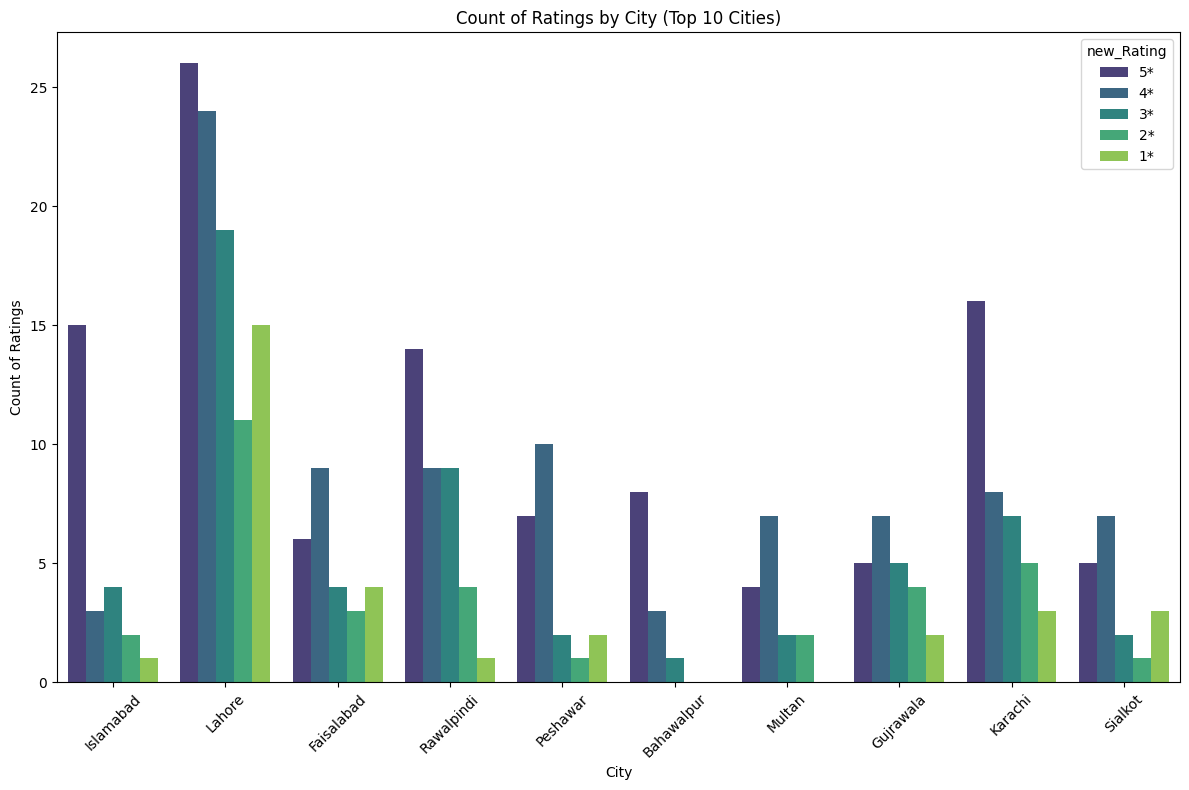

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Filter the data to exclude 0* ratings
filtered_df = df[df['new_Rating'] != '0*']

# Count the number of top ratings per city
top_cities_count = filtered_df['Cities'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 cities
top_cities_df = filtered_df[filtered_df['Cities'].isin(top_cities_count)]

# Visualization

# Bar Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Cities', data=top_cities_df, hue='new_Rating', palette='viridis')
plt.title('Count of Ratings by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To get a clearer look at the distribution, we will exlucde 0*. We can see that Lahore has the highest Rated institutions, followed by Karachi. Although this gives us a better view, it should still be noticed that the top rated institutes are only around 50 out of a total of around 200  institutes in Lahore.

# Lowest Rated Schools City wise

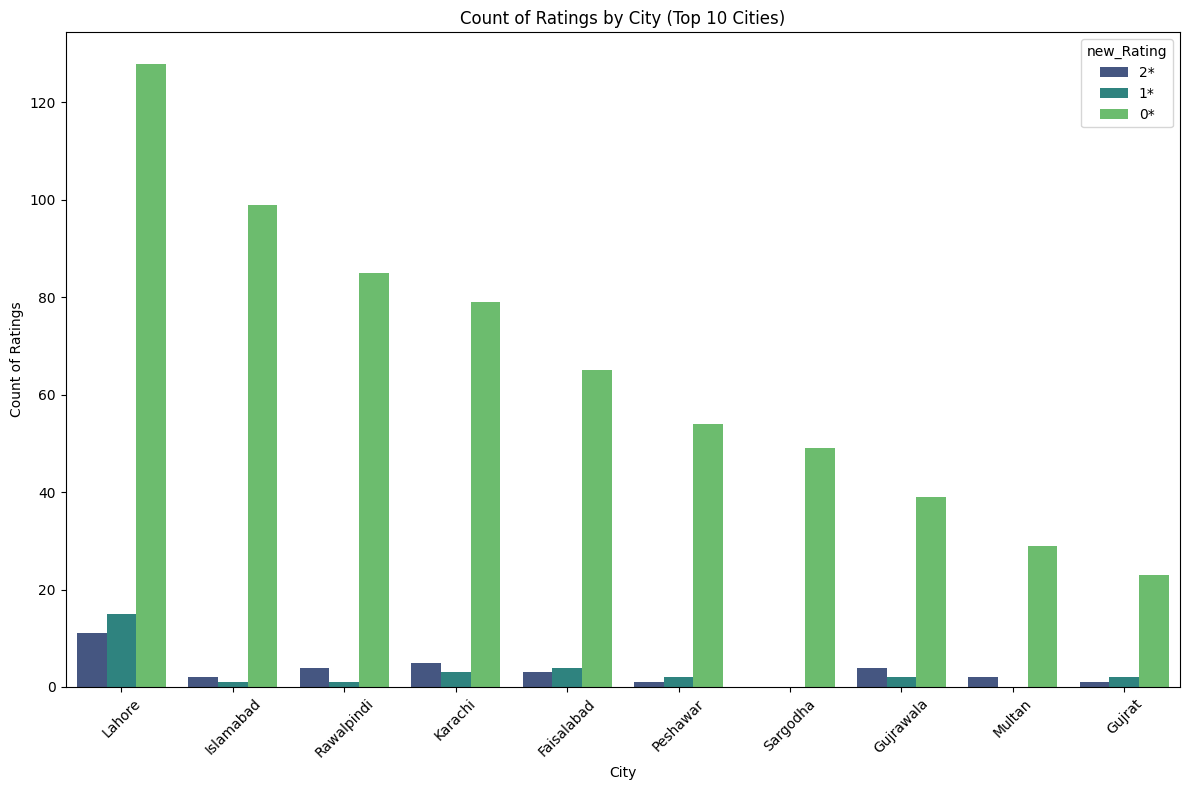

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include 0*, 1*, and 2* ratings
filtered_df = df[~df['new_Rating'].isin(['3*', '4*', '5*'])]

# Count the number of top ratings per city
top_cities_count = filtered_df['Cities'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 cities
top_cities_df = filtered_df[filtered_df['Cities'].isin(top_cities_count)]

# Visualization

# Bar Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Cities', data=top_cities_df, hue='new_Rating', palette='viridis',
              order=top_cities_df['Cities'].value_counts().index, # Orders x-axis by count
              hue_order=sorted(top_cities_df['new_Rating'].unique(), reverse=True)) # Orders hue in descending
plt.title('Count of Ratings by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This shows that Lahore has the highest and the lowest rated institutes. and also that rural cities need a lot of efforts in improving their educational standards.

# Anova Test

We will run anova test to see if ratings are different across cities.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Convert 'new_Rating' to numerical values
rating_mapping = {'0*': 0, '1*': 1, '2*': 2, '3*': 3, '4*': 4, '5*': 5}
df['new_Rating_encoded'] = df['new_Rating'].map(rating_mapping)

# Data Overview
print(df.head())
print(df.describe())

# Group by Cities and get the mean rating
city_ratings = df.groupby('Cities')['new_Rating_encoded'].mean()
print(city_ratings)

# ANOVA
model = ols('new_Rating_encoded ~ C(Cities)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

                                                Name  \
0                                   Campus.pk Lahore   
1        Allama Iqbal Open University Aiou Islamabad   
2           Government College University Gcu Lahore   
3             Govt College University GCU Faisalabad   
4  Lahore College For Women University (Lcwu) Lahore   

                                            Location  \
0  Office 206, 2nd Floor Siddique Trade Center Ma...   
1                        Sector H-8, Islamabad-44000   
2          GC University, Katchery Road Lahore 54000   
3                       Kotwali Rd, Faisalabad 38000   
4                Near Wapda Flats, Jail Road, Lahore   

                                       Study Program   Sector Rating  \
0                FSc Pre Engineering Fsc Pre Medical  Private     0*   
1  FSc Pre Engineering ICs Computer Science FSc P...   Public     5*   
2  FSc Pre Engineering ICS Computer Science FSc P...   Public     4*   
3  FSc Pre-Engineering ICS FSc Pre-Med

 In the ANOVA results, the p-value is 0.004419. This is less than the typical significance level of 0.05, indicating that there is a statistically significant difference in new_Rating across the different cities.

# Tukey Test

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['new_Rating_encoded'], df['Cities'])

# Print the Tukey's HSD results
print(tukey_results)



           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
         Bhakkar       Abbottabad  -3.1034    1.0 -11.3695  5.1627  False
         Bhakkar            Abdal      0.0    1.0 -11.4935 11.4935  False
         Bhakkar             Addu      0.0    1.0 -11.4935 11.4935  False
         Bhakkar          Alamgir      0.5    1.0  -9.4537 10.4537  False
         Bhakkar    Alipur Chatta     -4.0    1.0 -15.4935  7.4935  False
         Bhakkar         Arifwala     -4.0    1.0 -12.9029  4.9029  False
         Bhakkar           Attock  -2.8636    1.0 -11.1735  5.4462  False
         Bhakkar     BAHAWALNAGAR     -4.0    1.0 -15.4935  7.4935  False
         Bhakkar          BHAKKAR     -4.0    1.0 -15.4935  7.4935  False
         Bhakkar            Badin     -4.0    1.0 -13.0864  5.0864  False
         Bhakkar      Baha-ud-Din  -2.

# **Recommendations :**

Here are some recommendations for stakeholders to improve the education status:

**1**. Focus on Cities with Higher Negative Ratings (0 and 1)**:

Lahore, Islamabad, Faisalabad, Rawalpindi, and Karachi have notably high counts of 0* ratings. Prioritize these cities for immediate intervention to address the underlying issues causing these negative ratings.



**2**. Conduct Detailed Needs Assessments:

Perform in-depth assessments in cities with high negative ratings to understand specific problems such as inadequate infrastructure, lack of trained teachers, or insufficient educational resources. This will help tailor solutions to each city's unique challenges.



**3**. Promote Best Practices Across Cities:

Identify and replicate successful strategies from cities with higher positive ratings (5*, 4*). Sharing best practices can help uplift education standards in other cities.



**4**. Enhance Teacher Training Programs:

Invest in continuous professional development and training for teachers, especially in cities where have higher number of schools but  low ratings like Rawalpindi and Sargodha. Effective teacher training can significantly improve the quality of education and student outcomes.



**5**. Engage with Local Communities:

Foster strong partnerships with local communities to understand their concerns and involve them in the decision-making process. Community involvement can lead to more sustainable and accepted solutions.

